In [1]:
import os
os.chdir("..")
print(os.getcwd())

/home/b/b382397/AQUA/diagnostics/ocean_circulation


In [2]:
%load_ext autoreload
%autoreload 2
from aqua import Reader,catalogue, inspect_catalogue
import ocean_circulation_func as fn
from aqua.util import load_yaml

FDB5 binary library not present on system, disabling FDB support.


In [3]:
# Here we load the EN4 observations
reader = Reader(model='EN4',exp='en4',source='monthly')
den4=reader.retrieve()
den4=den4.rename({"depth":"lev"}) # We standardise the name for the vertical dimension
den4=den4[["ocpt","so"]].resample(time="M").mean()  # And we keep only the relevant variables in the dataset

In [15]:
# Here we load the data of a model (chosen from the catalog as an example )
reader = Reader(model='FESOM', exp='tco2559-ng5-cycle3', source="lra-r100-monthly")
dmod = reader.retrieve()

dmod=dmod.rename({"nz1":"lev"}) # We standardise the name for the vertical dimension
dmod=dmod[["ocpt","so"]].resample(time="M").mean() # And we keep only the relevant variables in the dataset

In [5]:
# Here we compute the regional average of temperature and salinity in the Labrador Sea region (other regions can be selected/defined) 
dmod_ls_mean=fn.weighted_area_mean(dmod, 'Labrador Sea') # In the model (monthly)
den4_ls_mean=fn.weighted_area_mean(den4, 'Labrador Sea') # In the obs (monthly)
# Other predefined regions are the 'Irminger Sea', the 'GIN Seas', the 'Southern Ocean' and the 'Weddell Sea'

2023-07-07 01:13:46,901 - INFO -  data slicing for this region, latitude 50.0 to 65.0, longitude 300.0 to 325.0
2023-07-07 01:13:46,941 - INFO -  data slicing for this region, latitude 50.0 to 65.0, longitude 300.0 to 325.0


In [6]:
# Here we compute the density values (referred to the surface level, sigma0) first for the Labrador Sea 
rho_t_s_labrador_mod= fn.convert_variables(dmod_ls_mean) # In the model (monthly)
rho_t_s_labrador_en4= fn.convert_variables(den4_ls_mean) # In the obs (monthly)

In [7]:
%load_ext autoreload
%autoreload 2
from aqua import Reader,catalogue, inspect_catalogue
import ocean_circulation_func as fn
from aqua.util import load_yaml

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
config = load_yaml("config.yaml")
outputfig= config["outputfig"]


2023-07-07 02:25:38,299 - INFO -  data slicing for this region, latitude 50.0 to 65.0, longitude 300.0 to 325.0
2023-07-07 02:25:38,732 - INFO -  data slicing for this region, latitude 50.0 to 65.0, longitude 300.0 to 325.0
2023-07-07 02:26:01,023 - INFO - ./figs/vertical_TS_labrador_sea_mean.png saved


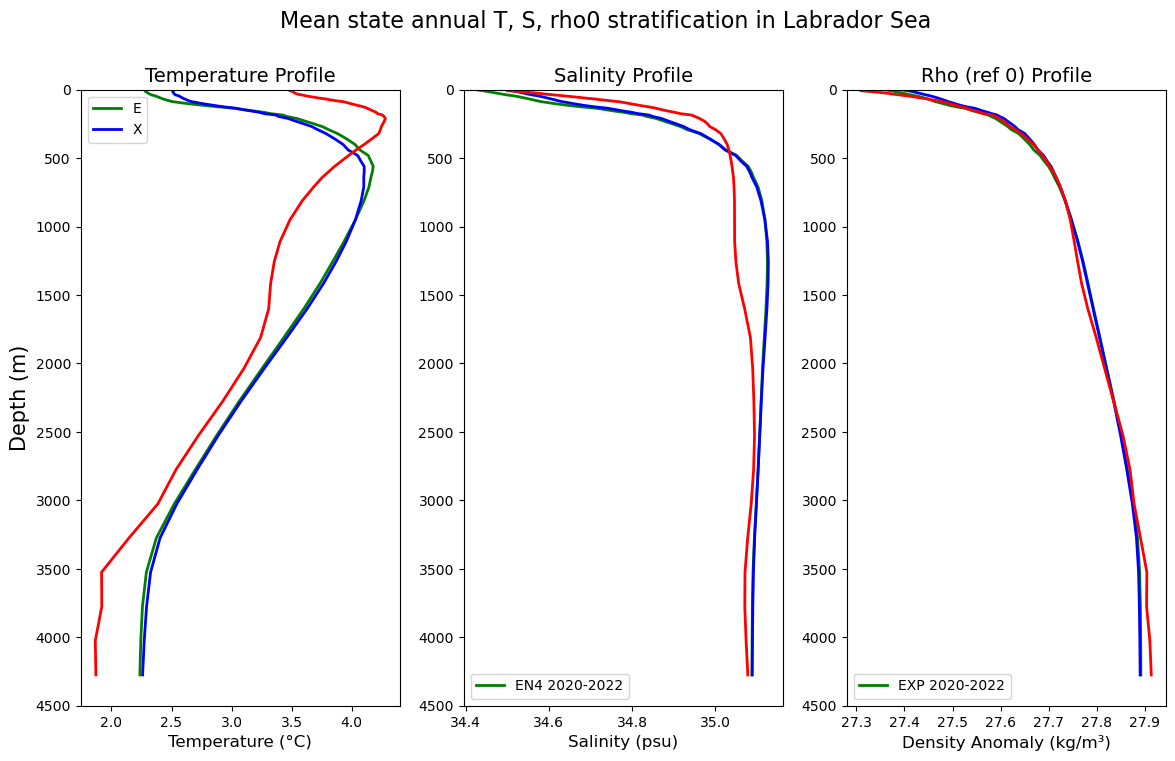

In [38]:
fn.plot_stratification(dmod, region= "Labrador Sea", time = "Apr", outputfig="./figs")